c:\Users\khg95\AppData\Local\Programs\Python\Python39\lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
c:\Users\khg95\AppData\Local\Programs\Python\Python39\lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


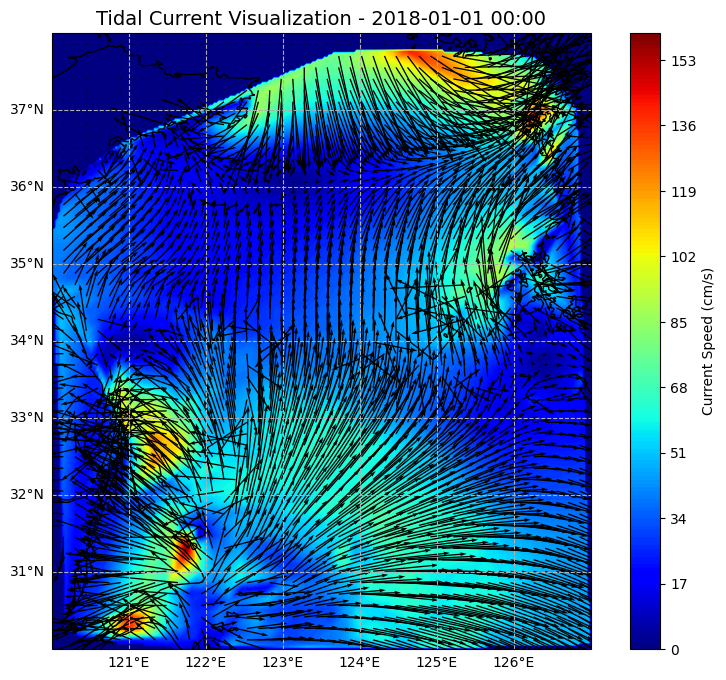

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# 그리드 파라미터 정의
lon_min, lon_max = 120, 127  # 경도 범위 (120~127°E)
lat_min, lat_max = 30, 38    # 위도 범위 (30~38°N)
n_cols = 236                 # 가로 픽셀 수 (경도 방향)
n_rows = 270                 # 세로 픽셀 수 (위도 방향)

# 데이터 경로
data_dir = r"C:\baramproject\tidal_database_interpolated"
map_file = r"C:\baramproject\sibal\land_sea_grid_cartopy_downsized.npy"
time_str = "20180101_0000"

# 데이터 로드
tidal_dir = np.load(os.path.join(data_dir, f"tidal_dir_{time_str}.npy"))
tidal_speed = np.load(os.path.join(data_dir, f"tidal_speed_{time_str}.npy"))
land_sea_grid = np.load(map_file)

# 그리드 좌표 생성
lon = np.linspace(lon_min, lon_max, n_cols)
lat = np.linspace(lat_max, lat_min, n_rows)  # 위도는 lat_max에서 lat_min으로 감소
lon_grid, lat_grid = np.meshgrid(lon, lat)

# 조류 방향을 라디안으로 변환 (cartopy에서 방향은 북쪽 기준, 시계 방향)
tidal_dir_rad = np.deg2rad(90 - tidal_dir)  # 90도에서 방향을 빼서 북쪽 기준으로 변환

# 조류 속도 성분 계산 (u: 동서, v: 남북)
u = tidal_speed * np.cos(tidal_dir_rad)  # 동서 성분 (동쪽이 양수)
v = tidal_speed * np.sin(tidal_dir_rad)  # 남북 성분 (북쪽이 양수)

# 시각화 설정
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# 해안선과 육지 추가
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.COASTLINE)

# 맵 데이터로 육지/바다 구분 (0: 바다, 1: 육지)
land_mask = land_sea_grid == 1
ax.contourf(lon_grid, lat_grid, land_mask, levels=[0.5, 1.5], colors='lightgray', transform=ccrs.PlateCarree())

# 조류 속도 색상으로 표시
speed_plot = ax.contourf(lon_grid, lat_grid, tidal_speed, cmap='jet', levels=np.linspace(0, 160, 161), transform=ccrs.PlateCarree())
plt.colorbar(speed_plot, ax=ax, label='Current Speed (cm/s)')

# 조류 방향 화살표 표시 (간격을 조정하여 화살표 밀도 조절)
skip = (slice(None, None, 5), slice(None, None, 5))  # 5칸 간격으로 표시
ax.quiver(lon_grid[skip], lat_grid[skip], u[skip], v[skip], transform=ccrs.PlateCarree(), scale=500, color='black')

# 그리드 라인과 라벨 추가
gl = ax.gridlines(draw_labels=True, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.top_labels = False
gl.right_labels = False

# 제목 설정
plt.title(f"Tidal Current Visualization - 2018-01-01 00:00", fontsize=14)

# 표시
plt.show()